1.

In [6]:
import pandas as pd


2.

In [27]:
imdb_df = pd.read_csv("data/imdb_1000.csv")

In [17]:
bikes_df = pd.read_csv("data/bikes.csv", sep=";", parse_dates=['Date'], dayfirst=True, index_col='Date')

In [19]:
bikes_df.head(n=3)

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


In [20]:
imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [21]:
imdb_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [22]:
imdb_df['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [23]:
imdb_df[['title', 'genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


In [24]:
imdb_df.duration.dtype

dtype('int64')

In [25]:
imdb_df.duration.values[:10]

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139], dtype=int64)

In [26]:
to_uppercase = lambda x: x.upper()
imdb_df['title'].apply(to_uppercase).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

<Axes: xlabel='Date'>

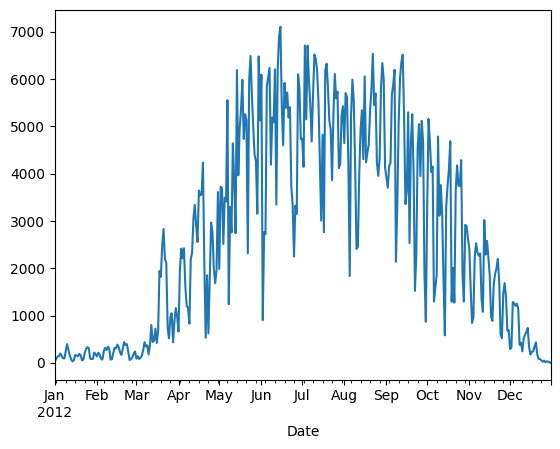

In [28]:
bikes_df['Berri1'].plot()

<Axes: xlabel='Date'>

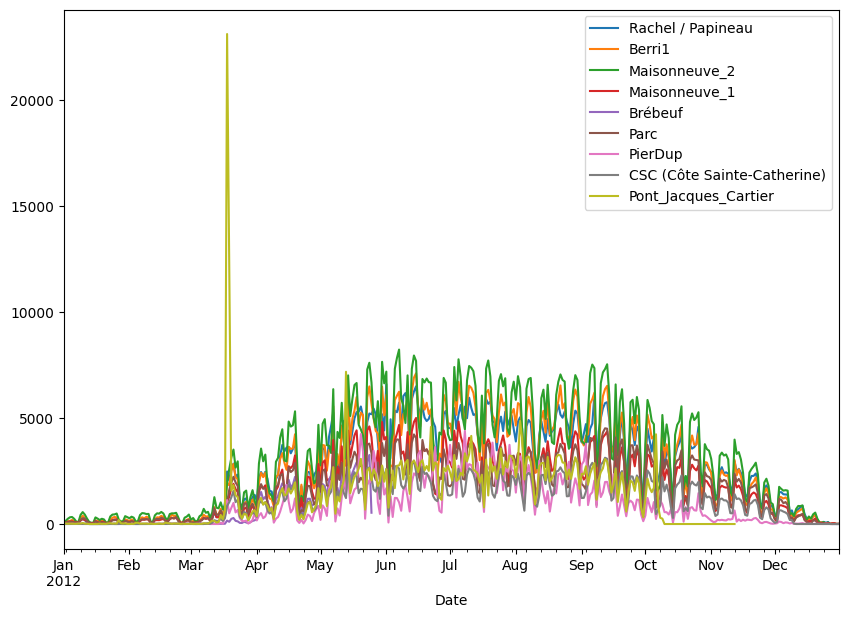

In [29]:
bikes_df.plot(figsize=(10,7))

In [30]:
imdb_df['genre'].value_counts()

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: count, dtype: int64

<Axes: xlabel='genre'>

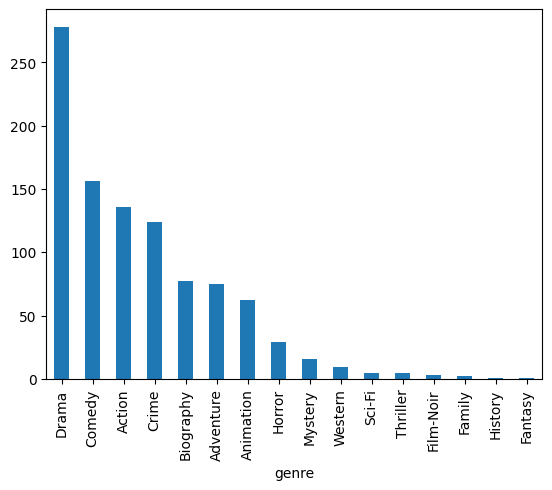

In [31]:
imdb_df['genre'].value_counts().plot.bar()

<Axes: ylabel='count'>

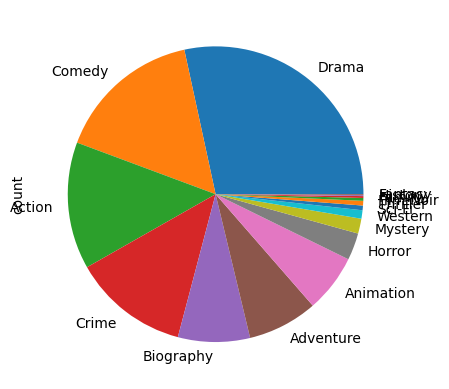

In [32]:
imdb_df['genre'].value_counts().plot.pie()

In [33]:
bikes_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [34]:
bikes_df.loc['2012-01-01']

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                          5.0
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            27.0
Name: 2012-01-01 00:00:00, dtype: object

In [35]:
bikes_df.iloc[10]

Unnamed: 1                     00:00
Rachel / Papineau                194
Berri1                           273
Maisonneuve_2                    443
Maisonneuve_1                    182
Brébeuf                          7.0
Parc                             258
PierDup                           12
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            20.0
Name: 2012-01-11 00:00:00, dtype: object

In [36]:
imdb_df[imdb_df['genre'] == 'Adventure'].head()

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."


In [37]:
good_movies_condition = (imdb_df['star_rating'] > 8) & (imdb_df['duration'] > 130)
imdb_df[good_movies_condition]['genre'].value_counts()

genre
Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Western       6
Comedy        6
Mystery       3
Horror        1
Animation     1
Name: count, dtype: int64

In [38]:
bikes_df['weekday'] = bikes_df.index.weekday